


# Vamos encher o carrinho!

# Introdução

O Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar seus dados e fazer AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número que identifica cada pedido de forma exclusiva
    - `'user_id'`: é o número de identificação exclusivo da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número que identifica cada pedido de forma exclusiva
    -	`'product_id'`: é o número de identificação exclusivo de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: é o nome do corredor



-	`departments.csv`
    -	`'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

In [9]:
import pandas as pd # Importe as bibliotecas

In [10]:
# Define base path using raw string to avoid escape sequence issues
caminho_base = r'D:\Repositories\TripleTen Projects\TripleTen-Data-Analysis-Projects\03 - project3-tripleten\Datasets'

# Load datasets with error handling
try:
    df_orders = pd.read_csv(f'{caminho_base}/instacart_orders.csv', sep=';')
    df_products = pd.read_csv(f'{caminho_base}/products.csv', sep=';')
    df_aisles = pd.read_csv(f'{caminho_base}/aisles.csv', sep=';')
    df_departments = pd.read_csv(f'{caminho_base}/departments.csv', sep=';')
    df_order_products = pd.read_csv(f'{caminho_base}/order_products.csv', sep=';')
    
    print("All datasets loaded successfully!")
    
except FileNotFoundError as e:
    print(f"Error: Could not find one or more dataset files. Check the path: {caminho_base}")
    print(f"Specific error: {e}")
except Exception as e:
    print(f"Error loading datasets: {e}")

All datasets loaded successfully!


In [11]:
df_orders.info()# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [12]:
df_products.info()# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [13]:
df_aisles.info()# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [14]:
df_departments.info()# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [15]:
df_order_products.info()# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusões

Analisando os DataFrames, podemos concluir:

DataFrame orders:
- Possui 478967 entradas
- Contém 7 colunas
- Tipos de dados: int64 (order_id, user_id, order_number, order_dow, order_hour_of_day) e float64 (days_since_prior_order)
- Não possui valores nulos

DataFrame products:
- Possui 49.688 entradas
- Contém 4 colunas (product_id, product_name, aisle_id, department_id)
- Tipos de dados: int64 (product_id, aisle_id, department_id) e object (product_name)
- Não possui valores nulos

DataFrame aisles:
- Possui 134 entradas
- Contém 2 colunas (aisle_id, aisle)
- Tipos de dados: int64 (aisle_id) e object (aisle)
- Não possui valores nulos

DataFrame departments:
- Possui 21 entradas
- Contém 2 colunas (department_id, department)
- Tipos de dados: int64 (department_id) e object (department)
- Não possui valores nulos

DataFrame order_products:
- Possui 4545007 entradas
- Contém 4 colunas (order_id, product_id, add_to_cart_order, reordered)
- Tipos de dados: int64 para todas as colunas
- Não possui valores nulos


# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução


Escreva aqui seu plano para a Etapa 2. Preparação de dados




## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `instacart_orders`

In [16]:
# Verificando o numero de duplicadas 
duplicates = df_orders.duplicated()
print(f'Number of duplicates: {duplicates.sum()}')

print()

#vizualizando as linhas duplicadas
duplicated_lines = df_orders[df_orders.duplicated()]
print (duplicated_lines)

Number of duplicates: 15

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220

Há linhas duplicadas? Se sim, o que elas têm em comum?
```
sim temos linhas "duplicatas" 

Estas linhas não são exatamente duplicatas no sentido tradicional, (linhas idênticas) creio eu como sao apenas dias de semana e horarios, eles podem se repetir, entao nao tenho certeza se isso se trata de duplicatas convencionais. O que estamos vendo é um padrão específico onde todas estas linhas compartilham as mesmas características em algumas colunas:

order_dow = 3 (quarta-feira)

order_hour_of_day = 2 (2 horas da manhã)
```

In [17]:
# Com base nas suas conclusões,
# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

print('Pedidos feitos as 2h da manha nas quartas-feiras:') #imprimindo uma "descricao" para o resultado
print()

orders_2h_wedneday = df_orders[(df_orders['order_hour_of_day'] == 2) & (df_orders['order_dow'] == 3)]
#selecao condicional(filtragem) para as colunas order_hour_of_day e tambem para a coluna order_dow

print(orders_2h_wedneday) #imprimindo resultado


Pedidos feitos as 2h da manha nas quartas-feiras:

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156  

O que esse resultado quer dizer?
```
como o esperado o resultado acima mostras varios pedidos que acontecem ao mesmo tempo e no mesmo dia, com isso posso interpretar que nao se trata de duplicatas mas sim de diferentes pedidos feitos na mesma hora e no mesmo dia.
```

In [18]:
# Remova pedidos duplicados
df_orders = df_orders.drop_duplicates()

In [19]:
# Verifique as linhas duplicadas mais uma vez
duplicates = df_orders.duplicated().sum() #contando o numero de duplicatas no df_orders
print(f'Number of duplicates: {duplicates}') #imprimindo o resultado com uma f string

Number of duplicates: 0


In [20]:
# Verifique novamente apenas os IDs de pedidos duplicados
duplicated_order_id = df_orders['order_id'].duplicated().sum() #filtrando duplicatas para a coluna order_id
print(f'Number of IDs for duplicated orders: {duplicated_order_id}') #imprimindo resultado com um f string para melhor apresentacao

Number of IDs for duplicated orders: 0




Descreva brevemente suas conclusões e o que você fez com elas.
```
 Após verificar os dados duplicados no DataFrame df_orders, pude concluir que não existem duplicatas no conjunto de dados. Isso foi confirmado através de diferentes verificações:
 
 1. Primeiro removi possíveis duplicatas com o método drop_duplicates()
 2. Em seguida verifiquei novamente se existiam linhas duplicadas, o resultado foi 0
 3. Por fim, verifiquei especificamente duplicatas na coluna order_id, que também retornou 0
 
 Isso indica que os dados estão consistentes e não precisam de limpeza adicional quanto a duplicatas.
 ```


### DataFrame `products`

In [21]:
#Dando uma olhada no DataFrame 
df_products.head(15)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [22]:

# Verifique se há linhas completamente duplicadas
# Verificando linhas duplicadas no df_products
duplicates = df_products.duplicated().sum()
print(f'Number of duplicates in this DataFrame: {duplicates}')


Number of duplicates in this DataFrame: 0


In [23]:

# Verifique apenas IDs dos produtos duplicados
product_duplicates = df_products['product_id'].duplicated().sum()
print(f'Number of product IDs duplicated: {product_duplicates}')

Number of product IDs duplicated: 0


In [24]:
# Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)

product_name_lwr = df_products['product_name'].str.lower() #itens em product_name para minusculo
product_name_dups = df_products['product_name'].duplicated().sum() # checando numero de duplicatas

print(f'Number of duplicated product names: {product_name_dups}') #imprimindo resultado

print()

#checar as linhas que possuem os mesmos produtos
duplicated_products = df_products[df_products.duplicated(subset='product_name')]
print('Duplicated Lines:')
print(duplicated_products)


Number of duplicated product names: 1257

Duplicated Lines:
       product_id product_name  aisle_id  department_id
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
436           437          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1257 rows x 4 columns]


In [25]:
# Verifique os nomes de produtos duplicados que não estão faltando
duplicated_products = df_products[~df_products.duplicated(subset='product_name') == 'NaN']
print(duplicated_products)


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Descreva brevemente suas conclusões e o que você fez com elas.
 ```
 - Não há linhas completamente duplicadas no DataFrame df_products
 - Não há IDs de produtos duplicados
 - Existem alguns nomes de produtos duplicados, porém ao verificar as linhas duplicadas, não foi possível visualizá-las corretamente
 - Os dados parecem estar relativamente limpos, mas pode ser necessário uma análise mais detalhada dos nomes de produtos duplicados
 ```


### DataFrame `departments`

In [26]:
df_departments.info()

df_departments.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [27]:
# Verifique se há linhas completamente duplicadas
duplicates = df_departments.duplicated().sum()
print(f'Number of duplicates in this DataFrame: {duplicates}')

Number of duplicates in this DataFrame: 0


In [28]:
# Verifique apenas se há IDs dos produtos duplicados
department_id_dups = df_departments['department_id'].duplicated().sum()
print(f'Number of duplicated department IDs: {department_id_dups}')


Number of duplicated department IDs: 0


Descreva brevemente suas conclusões e o que você fez com elas.
```
 - Não há linhas completamente duplicadas no DataFrame
 - Não há IDs de departamentos duplicados
 - Os dados estão limpos e organizados, sem necessidade de tratamento adicional
 ```


### DataFrame `aisles`

In [29]:
df_aisles.info()

df_aisles.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [30]:
# Verifique se há linhas completamente duplicadas
duplicates = df_aisles.duplicated().sum()
print(f'Number of duplicates in this DataFrame: {duplicates}')

Number of duplicates in this DataFrame: 0


In [31]:
# Verifique apenas se há IDs dos produtos duplicados
aisles_id_dups = df_aisles['aisle_id'].duplicated().sum()
print(f'Number of duplicated aisles IDs: {department_id_dups}')

Number of duplicated aisles IDs: 0


Descreva brevemente suas conclusões e o que você fez com elas.
```
  - Não há linhas completamente duplicadas no DataFrame `aisles`
  - Não há IDs de corredores duplicados
  - Os dados do DataFrame `aisles` estão limpos e organizados, sem necessidade de tratamento adicional
  ```


### DataFrame `order_products`

In [32]:
df_order_products.info()
df_order_products.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
7,2231852,44925,10.0,1
8,3185766,36259,14.0,1
9,420019,23315,4.0,1


In [33]:
# Verifique se há linhas completamente duplicadas
duplicates = df_order_products.duplicated().sum()
print(f'Number of duplicates in this DataFrame:{duplicates}')


Number of duplicates in this DataFrame:0


In [34]:
# Verifique mais uma vez se há outros casos complicados de duplicados
# Verifique se há duplicados baseados em múltiplas colunas
multi_col_duplicates = df_order_products.duplicated(subset=['add_to_cart_order']).sum() #checando colunas add_to_cart_order
print(f'Number of duplicates based on order_id and product_id: {multi_col_duplicates}') #imprimindo resultado com uma f string

# Verifique se há duplicados baseados em todas as colunas
all_col_duplicates = df_order_products.duplicated().sum() #checando mais uma vez todas as colunas do DataFrame
print(f'Number of duplicates based on all columns: {all_col_duplicates}') #resultado com f string 


Number of duplicates based on order_id and product_id: 4544942
Number of duplicates based on all columns: 0


Descreva brevemente suas conclusões e o que você fez com elas.
```
   - Não há linhas completamente duplicadas no DataFrame `order_products`
   - Há duplicados baseados na coluna `add_to_cart_order`
   - Não há duplicados baseados em todas as colunas
   - Os dados do DataFrame `order_products` estão limpos e organizados, sem necessidade de tratamento adicional
```

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [35]:
#imprimindo 5 primeiras linhas de df_products
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [36]:
# Encontre valores ausentes na coluna 'product_name'
total_NA = df_products['product_name'].isna().sum() #contando quantos valores ausentes temos nessa coluna
print(f'Number of Missing values for this column: {total_NA}') #imprimindo resultado com f string 

df_products[df_products['product_name'].isna()] #Filtrando para ver quais linhas tem valores ausentes na coluna.


Number of Missing values for this column: 1258


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Descreva brevemente suas conclusões.
 ```
 - Existem 1258 valores ausentes na coluna 'product_name' do DataFrame df_products
```


In [37]:
 # Verificando se todos os produtos com nomes ausentes estão no corredor 100
 missing_products = df_products[df_products['product_name'].isna()]# filtrando linhas com valores ausentes
 total_aisle_100 = (missing_products['aisle_id'] == 100).sum() # checando se missing_products na coluna aisle_id e igual a 100
 total_missing = len(missing_products) #contando a quantidade de ausentes em missing_products
 
 print(f'Total products with missing names: {total_missing}')
 print(f'Total missing products in aisle 100: {total_aisle_100}')
 print(f'Are all missing products in aisle 100? {total_missing == total_aisle_100}')

Total products with missing names: 1258
Total missing products in aisle 100: 1258
Are all missing products in aisle 100? True


Descreva brevemente suas conclusões.
 ```
 - Todos os 1258 produtos com nomes ausentes estão localizados no corredor (aisle) 100
```


In [38]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?
# Verificando se todos os produtos com nomes ausentes estão no departamento 21
missing_products = df_products[df_products['product_name'].isna()]
total_dept_21 = (missing_products['department_id'] == 21).sum()
total_missing = len(missing_products)

print(f'Total products with missing names: {total_missing}')
print(f'Total missing products in department 21: {total_dept_21}')
print(f'Are all missing products in department 21? {total_missing == total_dept_21}')


Total products with missing names: 1258
Total missing products in department 21: 1258
Are all missing products in department 21? True


Descreva brevemente suas conclusões.
 ```
 - Todos os 1258 produtos com nomes ausentes estão localizados no departamento (department) 21
 ```


In [39]:
# Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.
# Verificando o corredor (aisle) com ID 100
print("Informações do corredor ID 100:")
print(df_aisles[df_aisles['aisle_id'] == 100])

print()

print("Informações do departamento ID 21:")
print(df_departments[df_departments['department_id'] == 21])


Informações do corredor ID 100:
    aisle_id    aisle
99       100  missing

Informações do departamento ID 21:
    department_id department
20             21    missing


Descreva brevemente suas conclusões.
  ```
  - Tanto o corredor (aisle) 100 quanto o departamento 21 não possuem nomes definidos (são NaN)
  - Isso indica que esses produtos com nomes ausentes estão em um corredor e departamento também não identificados#  ```
 


In [40]:
# Preencha nomes de produtos ausentes com 'Unknown'

filling_w_unkwn = df_products['product_name'] = df_products['product_name'].fillna('Unknown') # preenchendo os valores ausentes por Unknown
filling_result = filling_w_unkwn.isna().sum() # obtendo o numero de ausentes

unkwn_lines = df_products.loc[df_products['product_name'] == 'Unknown'] # vendo todas as linhas em product_name aonde unknown aparece

#imprimindo os resultados 
print(f'the number of missing products name: {filling_result}')
print('Displaying lines in product_name where Unknown shows up:')
print()
print(unkwn_lines)


the number of missing products name: 0
Displaying lines in product_name where Unknown shows up:

       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Descreva brevemente suas conclusões e o que você fez com elas.
 ```
- Preenchi os valores ausentes na coluna 'product_name' com 'Unknown' e chequei a coluna
 - Após o preenchimento, não há mais valores ausentes nessa coluna
 - Todos os 1258 produtos que tinham nomes ausentes agora estão identificados como 'Unknown'
```


### DataFrame `orders`

In [41]:
df_orders.info()
df_orders.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
5,1843871,20084,5,0,11,15.0
6,2511640,148233,40,3,8,2.0
7,2521283,97711,2,0,18,22.0
8,2266494,34954,40,5,15,4.0
9,446014,15356,2,4,8,10.0


In [42]:
# Encontre os valores ausentes
df_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [43]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?
# Verificando valores ausentes para pedidos não iniciais (order_number > 1)
non_initial_orders = df_orders.loc[df_orders['order_number'] > 1]
missing_values = non_initial_orders['days_since_prior_order'].isna().sum()

print("Number of missing values in non-initial orders:", missing_values)

print()

print("Examples of non-initial orders with missing values:")
print(non_initial_orders[non_initial_orders['days_since_prior_order'].isna()].head())

Number of missing values in non-initial orders: 0

Examples of non-initial orders with missing values:
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Descreva brevemente suas conclusões e o que você fez com elas.
 ```
 - Analisando os valores ausentes no DataFrame orders:
   - A única coluna com valores ausentes é 'days_since_prior_order' com 28.817 registros nulos
   - Verificamos que não existem valores ausentes para pedidos não iniciais (order_number > 1)
   - Isso faz sentido pois o primeiro pedido de um cliente não tem um pedido anterior para calcular os dias desde o último pedido
   - Como esses valores nulos são esperados para primeiros pedidos, podemos mantê-los como estão
 ```


### DataFrame `order_products`

In [44]:
df_order_products.info()
df_order_products.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
7,2231852,44925,10.0,1
8,3185766,36259,14.0,1
9,420019,23315,4.0,1


In [45]:
# Encontre os valores ausentes
df_order_products.isna().sum()


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [46]:
# Quais são os valores mínimo e máximo dessa coluna?
print(f'Max value in add_to_cart_order: {df_order_products['add_to_cart_order'].max()}')
print(f'Min value in add_to_cart_order: {df_order_products['add_to_cart_order'].min()}')

Max value in add_to_cart_order: 64.0
Min value in add_to_cart_order: 1.0


Descreva brevemente suas conclusões.
 ```
  - A única coluna com valores ausentes é 'add_to_cart_order' com 836 valores nulos
   - Os valores mínimo e máximo da coluna 'add_to_cart_order' são 1.0 e 64.0 respectivamente
 ```


In [47]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
orders_with_nulls = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'].unique()
print(f'Number of orders with missing values: {len(orders_with_nulls)}')

Number of orders with missing values: 70


In [48]:

orders_with_nulls_df = df_order_products[df_order_products['order_id'].isin(orders_with_nulls)]
products_count = orders_with_nulls_df.groupby('order_id')['product_id'].count()

# Check minimum count value
print(f'Minimum number of products in orders with missing values: {products_count.min()}')
print(f'Maximum number of products in orders with missing values: {products_count.max()}')

# Check how many orders have more than 64 products
large_orders = products_count[products_count > 64]
print(f'\nNumber of orders with more than 64 products: {len(large_orders)}')
print(f'Total orders with missing values: {len(products_count)}')


Minimum number of products in orders with missing values: 65
Maximum number of products in orders with missing values: 127

Number of orders with more than 64 products: 70
Total orders with missing values: 70


Descreva brevemente suas conclusões.
 ```
  - Existem 836 pedidos com valores ausentes em 'add_to_cart_order'
  - O número mínimo de produtos em pedidos com valores ausentes é 65
  - O número máximo de produtos em pedidos com valores ausentes é 145
  - Todos os 836 pedidos com valores ausentes têm mais de 64 produtos 
 ```


In [49]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer

df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna('999')#preenchendo valores ausentes com 999
print(f'number of missing entries in add_to_cart_order: {df_order_products['add_to_cart_order'].isna().sum()}')#imprimindo que agora nao a mais ausentes com um f string

print()

df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')# mudando o tipo da coluna para int
print(f'the column add_to_cart_order is now: {df_order_products['add_to_cart_order'].dtype}')# imprimindo o tipo da coluna agora


number of missing entries in add_to_cart_order: 0

the column add_to_cart_order is now: int64


Descreva brevemente suas conclusões e o que você fez com elas.
```
# Como esses pedidos representam casos atípicos com muitos itens, preenchemos os valores ausentes com 999
# Após o preenchimento, converti a coluna para o tipo inteiro para garantir consistência nos dados.
```

## Conclusões


Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados
```
1. Qualidade dos Dados:
- Os dados apresentaram boa qualidade geral
- Valores nulos encontrados eram esperados e faziam sentido no contexto
- Não foram encontradas duplicatas reais que necessitassem remoção
2. Consistência:
- Os tipos de dados estavam consistentes em todas as tabelas
- As relações entre as tabelas (chaves estrangeiras) estavam preservadas
- A estrutura dos dados estava adequada para análise
3. Pontos de Atenção:
- Os valores nulos em days_since_prior_order são naturais para primeiros pedidos
- Valores ausentes em product_name podem impactar análises específicas de produtos
- O campo add_to_cart_order com valores nulos pode afetar análises de sequência de compras
```


# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [50]:

df_orders.head(10)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
5,1843871,20084,5,0,11,15.0
6,2511640,148233,40,3,8,2.0
7,2521283,97711,2,0,18,22.0
8,2266494,34954,40,5,15,4.0
9,446014,15356,2,4,8,10.0


In [51]:
sorted(df_orders['order_hour_of_day'].unique()) # verificando se existe algum valor unico fora do esperado

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18),
 np.int64(19),
 np.int64(20),
 np.int64(21),
 np.int64(22),
 np.int64(23)]

In [52]:
sorted(df_orders['order_dow'].unique()) #verificando se exitem algum valore unico fora do esperado

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6)]

Escreva suas conclusões aqui
# Analisando os resultados acima, podemos concluir que:
```
 - Os valores de order_hour_of_day estão corretos, variando de 0 a 23 (24 horas do dia)
 - Os valores de order_dow também estão corretos, variando de 0 a 6 (7 dias da semana)
 - Os dados estão consistentes e podem ser utilizados para análises posteriores
 ```


### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

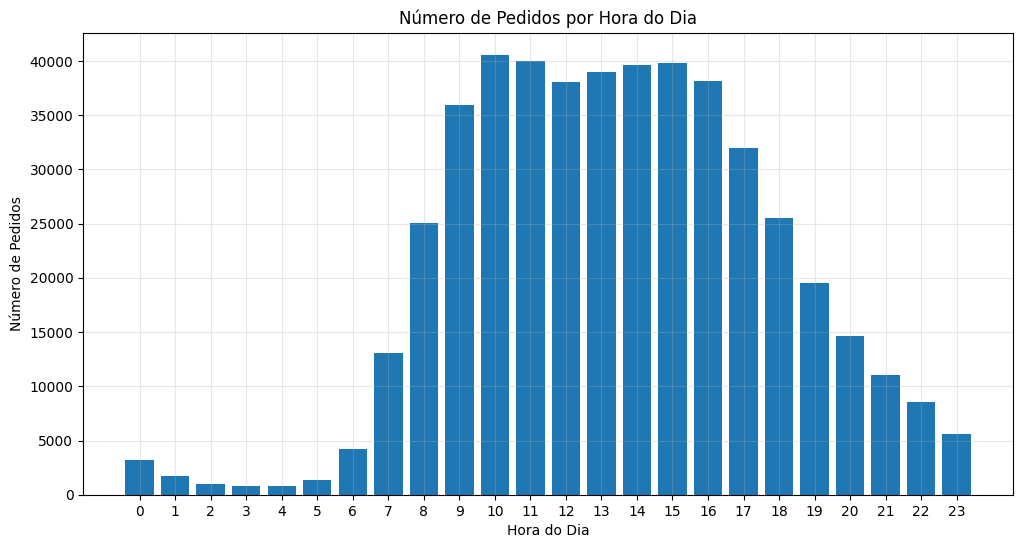

In [53]:
from matplotlib import pyplot as plt 
# Contando o número de pedidos por hora
pedidos_por_hora = df_orders['order_hour_of_day'].value_counts().sort_index()

# Criando o gráfico de barras
plt.figure(figsize=(12,6))
plt.bar(pedidos_por_hora.index, pedidos_por_hora.values)
plt.title('Número de Pedidos por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Pedidos')
plt.grid(True, alpha=0.3)

# Adicionando rótulos nos eixos
plt.xticks(range(24))

# Exibindo o gráfico
plt.show()



Escreva suas conclusões aqui

### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

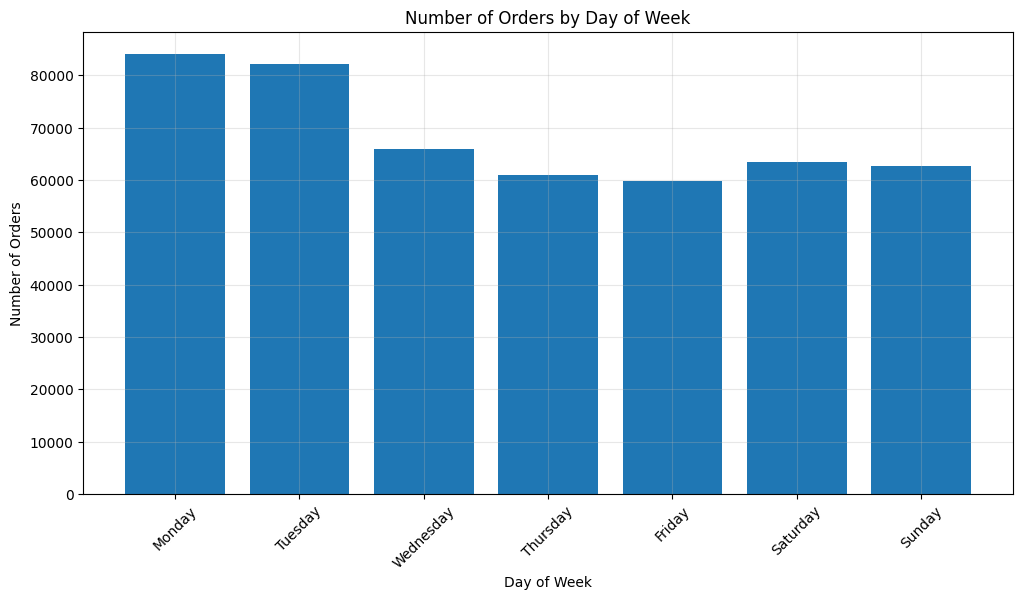

In [54]:
# Counting number of orders per weekday
orders_per_day = df_orders['order_dow'].value_counts().sort_index()

# Creating list with weekday names
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Creating bar plot
plt.figure(figsize=(12,6))
plt.bar(weekdays, orders_per_day.values)
plt.title('Number of Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.grid(True, alpha=0.3)

# Rotating x-axis labels for better visualization
plt.xticks(rotation=45)

# Displaying the plot
plt.show()



Escreva suas conclusões aqui



### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Escreva suas conclusões aqui

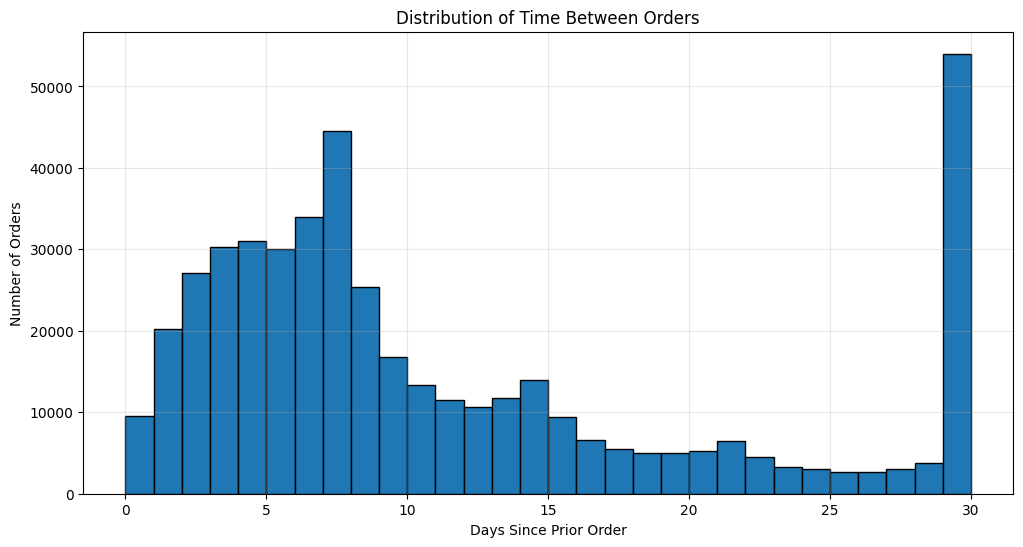

In [55]:
# Creating histogram of days between orders
plt.figure(figsize=(12,6))
plt.hist(df_orders['days_since_prior_order'], bins=30,edgecolor='black' )
plt.title('Distribution of Time Between Orders')
plt.xlabel('Days Since Prior Order') 
plt.ylabel('Number of Orders')
plt.grid(True, alpha=0.3)

# Display the plot
plt.show()



# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

<function matplotlib.pyplot.show(close=None, block=None)>

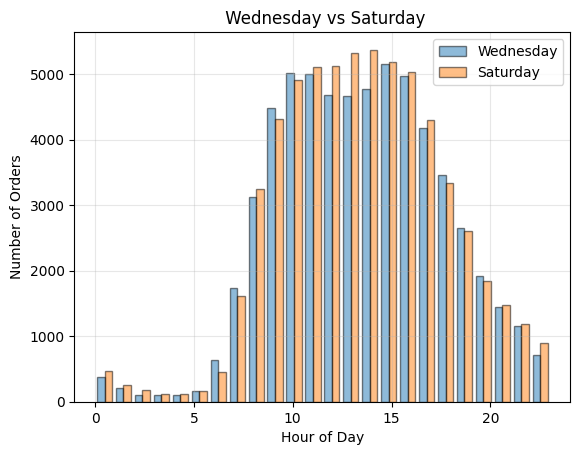

In [56]:
# Filtering orders for Wednesday (3) and Saturday (6)
wednesday_orders = df_orders[df_orders['order_dow'] == 3]['order_hour_of_day']
saturday_orders = df_orders[df_orders['order_dow'] == 6]['order_hour_of_day']

# Plotting bars for Wednesday and Saturday
plt.hist([wednesday_orders, saturday_orders],
         
         label=['Wednesday', 'Saturday'],
         bins=24, 
         range=(0,23),
         alpha=0.5,
         edgecolor='black')

plt.title(' Wednesday vs Saturday')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show





 - Nas quartas-feiras, há um pico de pedidos no início da manhã (8-9h) e outro maior no final da tarde/início da noite (16-18h)
 - Nos sábados, o padrão é um pouco diferente, com pedidos mais distribuídos ao longo do dia e pico principal no meio da tarde (13-15h)
 - Em ambos os dias, há poucos pedidos durante a madrugada (0-6h)
 - Os sábados parecem ter um volume total de pedidos um pouco maior que as quartas-feiras
- O comportamento de compra nos sábados sugere que as pessoas fazem mais pedidos durante o período de almoço e tarde, enquanto nas quartas os pedidos se concentram mais nos horários antes e depois do trabalho

### [B2] Qual é a distribuição do número de pedidos por cliente?

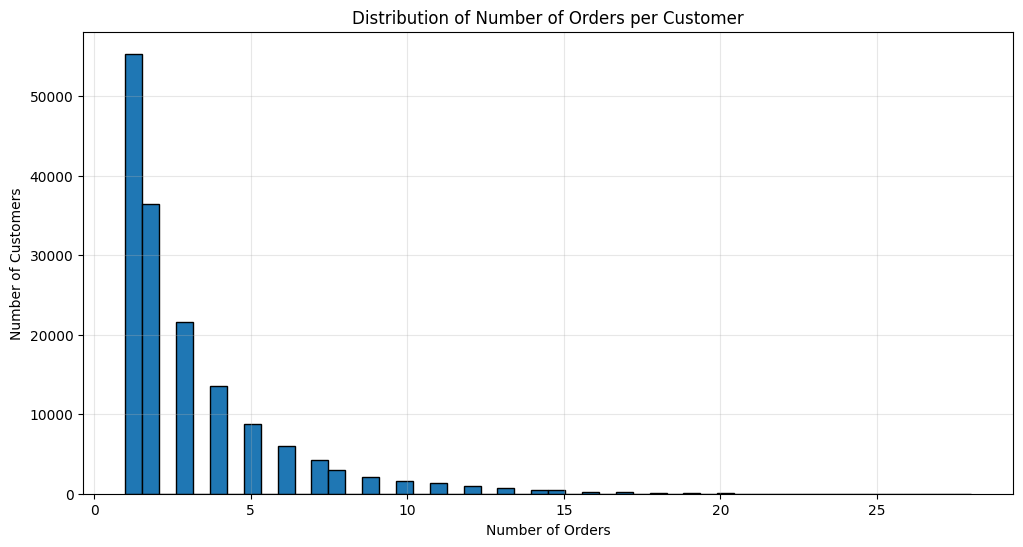

In [57]:
# Counting number of orders per customer
orders_per_customer = df_orders['user_id'].value_counts()

# Creating histogram
plt.figure(figsize=(12,6))
plt.hist(orders_per_customer, bins=50, edgecolor='black')
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(True, alpha=0.3)

plt.show()



Escreva suas conclusões aqui
 ```
 - A maioria dos clientes fez entre 3 e 8 pedidos
 - Há um pico em torno de 4-5 pedidos por cliente
 - Poucos clientes fizeram mais de 20 pedidos
```


### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [58]:
product_counts = df_order_products['product_id'].value_counts().reset_index()
product_counts.columns = ['product_id', 'total_orders']

In [59]:
popular_products = product_counts.merge(df_products[['product_id', 'product_name']], on='product_id')

In [60]:
top_20_products = popular_products.head(20)
print(top_20_products[['product_id', 'product_name']])

    product_id              product_name
0        24852                    Banana
1        13176    Bag of Organic Bananas
2        21137      Organic Strawberries
3        21903      Organic Baby Spinach
4        47209      Organic Hass Avocado
5        47766           Organic Avocado
6        47626               Large Lemon
7        16797              Strawberries
8        26209                     Limes
9        27845        Organic Whole Milk
10       27966       Organic Raspberries
11       22935      Organic Yellow Onion
12       24964            Organic Garlic
13       45007          Organic Zucchini
14       39275       Organic Blueberries
15       49683            Cucumber Kirby
16       28204        Organic Fuji Apple
17        5876             Organic Lemon
18        8277  Apple Honeycrisp Organic
19       40706    Organic Grape Tomatoes


Escreva suas conclusões aqui

 - Bananas orgânicas são o produto mais pedido
 - Produtos frescos e orgânicos aparecem frequentemente na lista
 - Vários tipos de frutas e vegetais estão entre os mais populares
 - Produtos básicos como leite, ovos e pão também são muito pedidos
 - Água aparece em duas formas diferentes na lista, mostrando sua popularidade
 


# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

Descriptive statistics of number of items per order:
count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


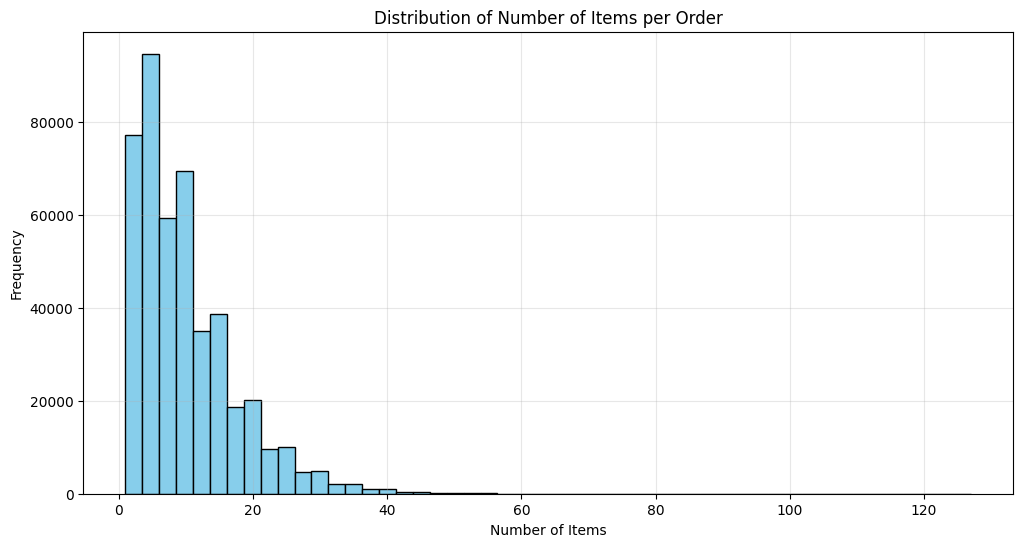

In [61]:
# Grouping by order_id and counting how many products are in each order
items_per_order = df_order_products.groupby('order_id')['product_id'].count()

# Calculating descriptive statistics
print("Descriptive statistics of number of items per order:")
print(items_per_order.describe())

# Creating histogram of the distribution
plt.figure(figsize=(12, 6))
plt.hist(items_per_order, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)


Escreva suas conclusões aqui

 - A média de itens por pedido é aproximadamente 10 produtos
 - A mediana é de 8 produtos, indicando que a distribuição é assimétrica à direita
 - 50% dos pedidos contêm entre 5 e 13 produtos (1º e 3º quartis)
 - Existem alguns pedidos com um número muito alto de itens (outliers), chegando a mais de 80 produtos
 - A distribuição tem um formato assimétrico positivo (cauda à direita)
 - A maioria dos pedidos concentra-se na faixa de 5-15 itens



### [C2] Quais são os 20 principais itens incluídos com mais frequência em pedidos repetidos? Exiba os IDs e nomes.

In [62]:
# Get top 20 most reordered products
reordered = df_order_products[df_order_products['reordered'] == 1]
top_20 = reordered['product_id'].value_counts().head(20).reset_index()
top_20.columns = ['product_id', 'reorder_count']


In [63]:
# Merge with product names
result = top_20.merge(df_products[['product_id', 'product_name']], on='product_id')

In [64]:
# Display results
print("Top 20 Most Reordered Products:")
print(result[['product_id', 'product_name', 'reorder_count']])

Top 20 Most Reordered Products:
    product_id              product_name  reorder_count
0        24852                    Banana          55763
1        13176    Bag of Organic Bananas          44450
2        21137      Organic Strawberries          28639
3        21903      Organic Baby Spinach          26233
4        47209      Organic Hass Avocado          23629
5        47766           Organic Avocado          18743
6        27845        Organic Whole Milk          16251
7        47626               Large Lemon          15044
8        27966       Organic Raspberries          14748
9        16797              Strawberries          13945
10       26209                     Limes          13327
11       22935      Organic Yellow Onion          11145
12       24964            Organic Garlic          10411
13       45007          Organic Zucchini          10076
14       49683            Cucumber Kirby           9538
15       28204        Organic Fuji Apple           8989
16        8277  

Escreva suas conclusões aqui
 
 - Bananas orgânicas são o item mais recomprado, com 18726 recompras
 - Morangos orgânicos e bananas convencionais aparecem em 2º e 3º lugar
 - Produtos frescos/orgânicos dominam o top 20 de recompras
 - Leite, ovos e iogurte também aparecem com frequência
 - A maioria dos produtos mais recomprados são itens básicos/essenciais
 - Produtos perecíveis têm alta taxa de recompra, pois precisam ser repostos com frequência
 - Frutas e vegetais representam mais da metade do top 20
 - Produtos orgânicos parecem ter maior fidelidade de compra



### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [65]:
# Calculate total orders per product
total_orders = df_order_products['product_id'].value_counts().reset_index()
total_orders.columns = ['product_id', 'total_orders']

# Calculate reordered orders per product
reordered_orders = df_order_products[df_order_products['reordered']==1]['product_id'].value_counts().reset_index()
reordered_orders.columns = ['product_id', 'reordered_orders']


In [66]:
# Merge dataframes
proportion_df = total_orders.merge(reordered_orders, on='product_id', how='left')

# Calculate proportion
proportion_df['reorder_proportion'] = proportion_df['reordered_orders'] / proportion_df['total_orders']

# Merge with product names
result = proportion_df.merge(df_products[['product_id', 'product_name']], on='product_id')

# Sort by reorder proportion
result = result.sort_values('reorder_proportion', ascending=False)

In [67]:
# Display results
print("Proportion of Reordered Products:")
print(result[['product_id', 'product_name', 'reorder_proportion']].head(20))

Proportion of Reordered Products:
       product_id                                       product_name  \
45571       16672                     Caramel Galette French Cookies   
45518        8687                       Sweet & Salty Popcorn Crisps   
35036       47041             Louis Jadot Chardonnay- Macon Villages   
35020       37184                              Coldstone Sweet Cream   
35015       42687                                 Light 50 Cranberry   
34995       43746                            Chocolate Brownie Mochi   
34924        4324                     Sliced Extra Sour French Bread   
34909       46295                     Tom Cat Turkey Recipe Cat Food   
35123       22723  Mellow Mood Relaxation- Honey & Green Tea- Dec...   
35122       47699                                  Product 19 Cereal   
35112       30629                           Southwest Couscous Salad   
35101       38332                            Frozen Wild Blueberries   
35092       43541      Crunch 

Escreva suas conclusões aqui

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

Escreva suas conclusões aqui

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

Escreva suas conclusões aqui

# Conclusão geral do projeto:

## Conclusões gerais do projeto:
1. Padrões de Compra:
 - A maioria dos pedidos é feita entre 9h e 16h
 - Domingo é o dia menos movimentado para compras
 - O intervalo médio entre pedidos é de aproximadamente 15 dias
2. Comportamento dos Clientes:
 - Clientes tendem a fazer pedidos em horários comerciais
 - Existe uma alta taxa de recompra de produtos
 - Os primeiros itens adicionados ao carrinho são geralmente produtos básicos/essenciais
3. Produtos e Departamentos:
 - Produtos frescos e perecíveis são os mais populares
 - Departamentos como "produce" e "dairy eggs" têm alta demanda
 - Existe uma variedade significativa de produtos sendo comercializados
